In [10]:
import numpy as np
import nibabel as nib
import glob
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tifffile import imsave
import os

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [11]:
TRAIN_DATASET_PATH = 'BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/'
#VALIDATION_DATASET_PATH = 'BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData'

test_image_flair=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_flair.nii').get_fdata()
print(test_image_flair.max())

1854.603271484375


In [30]:
#Scalers are applied to 1D so let us reshape and then reshape back to original shape. 
test_image_flair=scaler.fit_transform(test_image_flair.reshape(-1, test_image_flair.shape[-1])).reshape(test_image_flair.shape)


test_image_t1=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_t1.nii').get_fdata()
test_image_t1=scaler.fit_transform(test_image_t1.reshape(-1, test_image_t1.shape[-1])).reshape(test_image_t1.shape)

test_image_t1ce=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_t1ce.nii').get_fdata()
test_image_t1ce=scaler.fit_transform(test_image_t1ce.reshape(-1, test_image_t1ce.shape[-1])).reshape(test_image_t1ce.shape)

test_image_t2=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_t2.nii').get_fdata()
test_image_t2=scaler.fit_transform(test_image_t2.reshape(-1, test_image_t2.shape[-1])).reshape(test_image_t2.shape)

test_mask=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_seg.nii').get_fdata()
test_mask=test_mask.astype(np.uint8)

print(np.unique(test_mask))  #0, 1, 2, 4 (Need to reencode to 0, 1, 2, 3)
test_mask[test_mask==4] = 3  #Reassign mask values 4 to 3
print(np.unique(test_mask)) 

import random
n_slice=random.randint(0, test_mask.shape[2])

# plt.figure(figsize=(12, 8))

# plt.subplot(231)
# plt.imshow(test_image_flair[:,:,n_slice], cmap='gray')
# plt.title('Image flair')
# plt.subplot(232)
# plt.imshow(test_image_t1[:,:,n_slice], cmap='gray')
# plt.title('Image t1')
# plt.subplot(233)
# plt.imshow(test_image_t1ce[:,:,n_slice], cmap='gray')
# plt.title('Image t1ce')
# plt.subplot(234)
# plt.imshow(test_image_t2[:,:,n_slice], cmap='gray')
# plt.title('Image t2')
# plt.subplot(235)
# plt.imshow(test_mask[:,:,n_slice])
# plt.title('Mask')
# plt.show()


combined_x = np.stack([test_image_flair, test_image_t1, test_image_t1ce, test_image_t2], axis=3)
print(combined_x.shape)
combined_x = combined_x[56:184, 56:184, 13:141]  # Crop to 128x128x128x4
print(combined_x.shape)
test_mask = test_mask[56:184, 56:184, 13:141]
print(test_mask.shape)

# n_slice=random.randint(0, test_mask.shape[2])
# plt.figure(figsize=(12, 8))

# plt.subplot(221)
# plt.imshow(combined_x[:,:,n_slice, 0], cmap='gray')
# plt.title('Image flair')
# plt.subplot(222)
# plt.imshow(combined_x[:,:,n_slice, 1], cmap='gray')
# plt.title('Image t1ce')
# plt.subplot(223)
# plt.imshow(combined_x[:,:,n_slice, 2], cmap='gray')
# plt.title('Image t2')
# plt.subplot(224)
# plt.imshow(test_mask[:,:,n_slice])
# plt.title('Mask')
# plt.show()


imsave('BraTS2020_TrainingData/combined255.tif', combined_x)
np.save('BraTS2020_TrainingData/combined255.npy', combined_x)
#Verify image is being read properly
#my_img=imread('BraTS2020_TrainingData/combined255.tif')

my_img=np.load('BraTS2020_TrainingData/combined255.npy')

test_mask = to_categorical(test_mask, num_classes=4)
####################################################################


# # # images lists harley
t1_list = sorted(glob.glob('BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*t1.nii'))
t2_list = sorted(glob.glob('BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*t2.nii'))
t1ce_list = sorted(glob.glob('BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*t1ce.nii'))
flair_list = sorted(glob.glob('BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*flair.nii'))
mask_list = sorted(glob.glob('BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*seg.nii'))

#Each volume generates 18 64x64x64x4 sub-volumes. 
#Total 369 volumes = 6642 sub volumes

for img in range(len(t2_list)):   #Using t1_list as all lists are of same size
    print("Now preparing image and masks number: ", img)
    
    temp_image_t1=nib.load(t1_list[img]).get_fdata()
    temp_image_t1=scaler.fit_transform(temp_image_t1.reshape(-1, temp_image_t1.shape[-1])).reshape(temp_image_t1.shape)
    
    temp_image_t2=nib.load(t2_list[img]).get_fdata()
    temp_image_t2=scaler.fit_transform(temp_image_t2.reshape(-1, temp_image_t2.shape[-1])).reshape(temp_image_t2.shape)
   
    temp_image_t1ce=nib.load(t1ce_list[img]).get_fdata()
    temp_image_t1ce=scaler.fit_transform(temp_image_t1ce.reshape(-1, temp_image_t1ce.shape[-1])).reshape(temp_image_t1ce.shape)
   
    temp_image_flair=nib.load(flair_list[img]).get_fdata()
    temp_image_flair=scaler.fit_transform(temp_image_flair.reshape(-1, temp_image_flair.shape[-1])).reshape(temp_image_flair.shape)
        
    temp_mask=nib.load(mask_list[img]).get_fdata()
    temp_mask=temp_mask.astype(np.uint8)
    temp_mask[temp_mask==4] = 3  #Reassign mask values 4 to 3
    #print(np.unique(temp_mask))
    
    
    temp_combined_images = np.stack([temp_image_flair,temp_image_t1, temp_image_t1ce, temp_image_t2], axis=3)
    
    #Crop to a size to be divisible by 64 so we can later extract 64x64x64 patches. 
    #cropping x, y, and z
    temp_combined_images=temp_combined_images[56:184, 56:184, 13:141]
    temp_mask = temp_mask[56:184, 56:184, 13:141]
    
    val, counts = np.unique(temp_mask, return_counts=True)
    
    if (1 - (counts[0]/counts.sum())) > 0.01:  #At least 1% useful volume with labels that are not 0
        print("Save Me")
        temp_mask= to_categorical(temp_mask, num_classes=4)
        # Define the directory path
        img_directory = 'BraTS2020_TrainingData/input_data_3channels/images/'
        mask_directory = 'BraTS2020_TrainingData/input_data_3channels/masks/'

        # Create the directory if it does not exist
        os.makedirs(img_directory, exist_ok=True)
        os.makedirs(mask_directory, exist_ok=True)

        # Save the numpy array
        np.save(img_directory + 'image_' + str(img) + '.npy', temp_combined_images)
        np.save(mask_directory + 'mask_' + str(img) + '.npy', temp_mask)
        
        
    else:
        print("I am useless")   
   
     




[0 1 2 4]
[0 1 2 3]
(240, 240, 155, 4)
(128, 128, 128, 4)
(128, 128, 128)


C:\Users\000501\AppData\Local\Temp\ipykernel_3360\1156404404.py:69: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  imsave('BraTS2020_TrainingData/combined255.tif', combined_x)


Now preparing image and masks number:  0
Save Me
Now preparing image and masks number:  1
Save Me
Now preparing image and masks number:  2
Save Me
Now preparing image and masks number:  3
Save Me
Now preparing image and masks number:  4
I am useless
Now preparing image and masks number:  5
Save Me
Now preparing image and masks number:  6
Save Me
Now preparing image and masks number:  7
Save Me
Now preparing image and masks number:  8
Save Me
Now preparing image and masks number:  9
Save Me
Now preparing image and masks number:  10
Save Me
Now preparing image and masks number:  11
Save Me
Now preparing image and masks number:  12
Save Me
Now preparing image and masks number:  13
Save Me
Now preparing image and masks number:  14
Save Me
Now preparing image and masks number:  15
Save Me
Now preparing image and masks number:  16
Save Me
Now preparing image and masks number:  17
Save Me
Now preparing image and masks number:  18
Save Me
Now preparing image and masks number:  19
Save Me
Now p

ModuleNotFoundError: No module named 'split_folders'

In [32]:
import splitfolders  # or import split_folders

input_folder = 'BraTS2020_TrainingData/input_data_3channels/'
output_folder = 'BraTS2020_TrainingData/input_data_128/'
# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.75, .25), group_prefix=None) # default values

Copying files: 688 files [12:18,  1.07s/ files]


In [33]:
def load_img(img_dir, img_list):
    images=[]
    for i, image_name in enumerate(img_list):    
        if (image_name.split('.')[1] == 'npy'):
            
            image = np.load(img_dir+image_name)
                      
            images.append(image)
    images = np.array(images)
    
    return(images)

def imageLoader(img_dir, img_list, mask_dir, mask_list, batch_size):

    L = len(img_list)

    #keras needs the generator infinite, so we will use while true  
    while True:

        batch_start = 0
        batch_end = batch_size

        while batch_start < L:
            limit = min(batch_end, L)
                       
            X = load_img(img_dir, img_list[batch_start:limit])
            Y = load_img(mask_dir, mask_list[batch_start:limit])

            yield (X,Y) #a tuple with two numpy arrays with batch_size samples     

            batch_start += batch_size   
            batch_end += batch_size


In [46]:
#Test the generator
from matplotlib import pyplot as plt
import random
import os
import numpy as np

train_img_dir = "BraTS2020_TrainingData/input_data_128/train/images/"
train_mask_dir = "BraTS2020_TrainingData/input_data_128/train/masks/"
train_img_list=os.listdir(train_img_dir)
train_mask_list = os.listdir(train_mask_dir)

batch_size = 1

train_img_datagen = imageLoader(train_img_dir, train_img_list, 
                                train_mask_dir, train_mask_list, batch_size)

#Verify generator.... In python 3 next() is renamed as __next__()
img, msk = train_img_datagen.__next__()
print(img.shape)
print(msk.shape)

(1, 128, 128, 128, 4)
(1, 128, 128, 128, 4)


ValueError: num must be an integer with 1 <= num <= 4, not 5

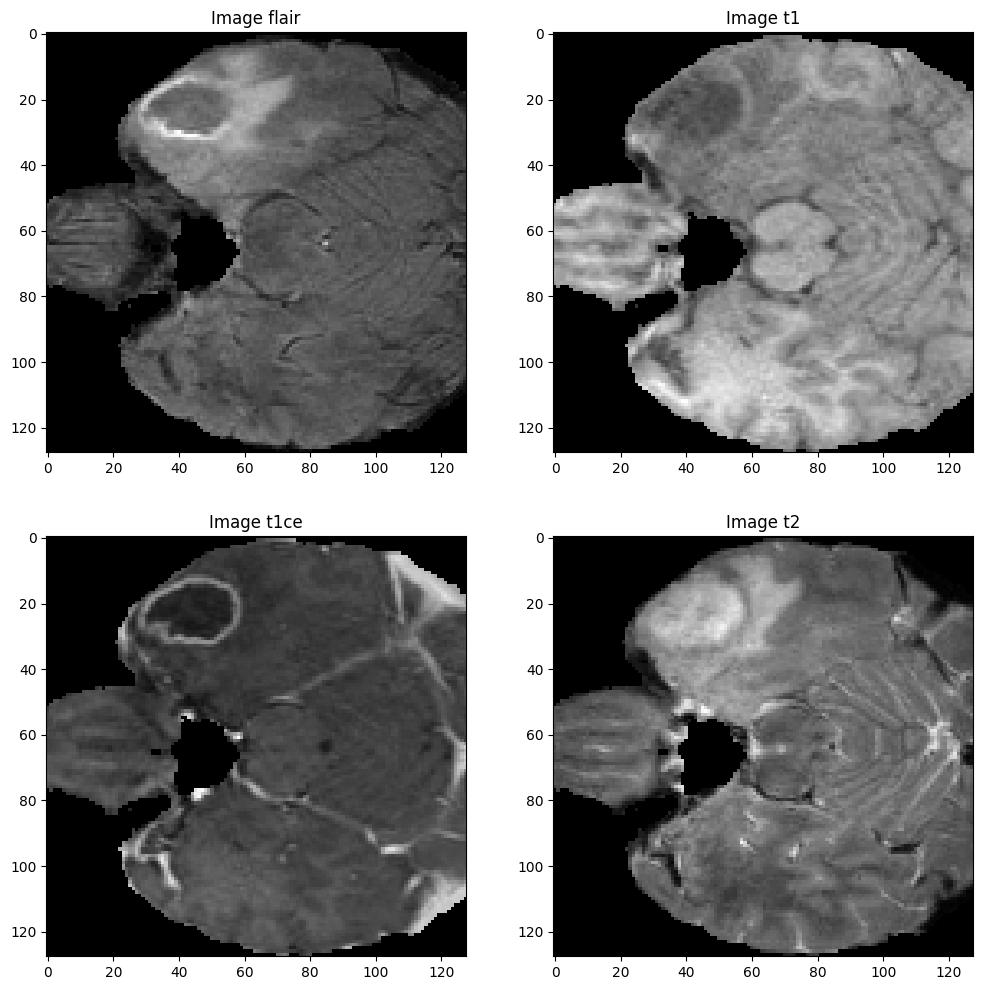

In [41]:
#Test the generator
from matplotlib import pyplot as plt
import random

train_img_dir = "BraTS2020_TrainingData/input_data_128/train/images/"
train_mask_dir = "BraTS2020_TrainingData/input_data_128/train/masks/"
train_img_list=os.listdir(train_img_dir)
train_mask_list = os.listdir(train_mask_dir)

batch_size = 2

train_img_datagen = imageLoader(train_img_dir, train_img_list, 
                                train_mask_dir, train_mask_list, batch_size)

#Verify generator.... In python 3 next() is renamed as __next__()
img, msk = train_img_datagen.__next__()


img_num = random.randint(0,img.shape[0]-1)
test_img=img[img_num]
test_mask=msk[img_num]
test_mask=np.argmax(test_mask, axis=3)

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t1ce')
plt.subplot(224)
plt.imshow(test_img[:,:,n_slice, 3], cmap='gray')
plt.title('Image t2')
plt.subplot(225)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [60]:
import torch
import torch.nn as nn
from Transformer import TransformerModel
from PositionalEncoding import FixedPositionalEncoding,LearnedPositionalEncoding
from Unet_skipconnection import Unet


class TransformerBTS(nn.Module):
    def __init__(
        self,
        img_dim,
        patch_dim,
        num_channels,
        embedding_dim,
        num_heads,
        num_layers,
        hidden_dim,
        dropout_rate=0.0,
        attn_dropout_rate=0.0,
        conv_patch_representation=True,
        positional_encoding_type="learned",
    ):
        super(TransformerBTS, self).__init__()

        assert embedding_dim % num_heads == 0
        assert img_dim % patch_dim == 0

        self.img_dim = img_dim
        self.embedding_dim = embedding_dim
        self.num_heads = num_heads
        self.patch_dim = patch_dim
        self.num_channels = num_channels
        self.dropout_rate = dropout_rate
        self.attn_dropout_rate = attn_dropout_rate
        self.conv_patch_representation = conv_patch_representation

        self.num_patches = int((img_dim // patch_dim) ** 3)
        self.seq_length = self.num_patches
        self.flatten_dim = 128 * num_channels

        self.linear_encoding = nn.Linear(self.flatten_dim, self.embedding_dim)
        if positional_encoding_type == "learned":
            self.position_encoding = LearnedPositionalEncoding(
                self.seq_length, self.embedding_dim, self.seq_length
            )
        elif positional_encoding_type == "fixed":
            self.position_encoding = FixedPositionalEncoding(
                self.embedding_dim,
            )

        self.pe_dropout = nn.Dropout(p=self.dropout_rate)

        self.transformer = TransformerModel(
            embedding_dim,
            num_layers,
            num_heads,
            hidden_dim,

            self.dropout_rate,
            self.attn_dropout_rate,
        )
        self.pre_head_ln = nn.LayerNorm(embedding_dim)

        if self.conv_patch_representation:

            self.conv_x = nn.Conv3d(
                128,
                self.embedding_dim,
                kernel_size=3,
                stride=1,
                padding=1
            )

        self.Unet = Unet(in_channels=4, base_channels=16, num_classes=4)
        self.bn = nn.BatchNorm3d(128)
        self.relu = nn.ReLU(inplace=True)


    def encode(self, x):
        if self.conv_patch_representation:
            # combine embedding with conv patch distribution
            x1_1, x2_1, x3_1, x = self.Unet(x)
            x = self.bn(x)
            x = self.relu(x)
            x = self.conv_x(x)
            x = x.permute(0, 2, 3, 4, 1).contiguous()
            x = x.view(x.size(0), -1, self.embedding_dim)

        else:
            x = self.Unet(x)
            x = self.bn(x)
            x = self.relu(x)
            x = (
                x.unfold(2, 2, 2)
                .unfold(3, 2, 2)
                .unfold(4, 2, 2)
                .contiguous()
            )
            x = x.view(x.size(0), x.size(1), -1, 8)
            x = x.permute(0, 2, 3, 1).contiguous()
            x = x.view(x.size(0), -1, self.flatten_dim)
            x = self.linear_encoding(x)

        x = self.position_encoding(x)
        x = self.pe_dropout(x)

        # apply transformer
        x, intmd_x = self.transformer(x)
        x = self.pre_head_ln(x)

        return x1_1, x2_1, x3_1, x, intmd_x

    def decode(self, x):
        raise NotImplementedError("Should be implemented in child class!!")

    def forward(self, x, auxillary_output_layers=[1, 2, 3, 4]):

        x1_1, x2_1, x3_1, encoder_output, intmd_encoder_outputs = self.encode(x)

        decoder_output = self.decode(
            x1_1, x2_1, x3_1, encoder_output, intmd_encoder_outputs, auxillary_output_layers
        )

        if auxillary_output_layers is not None:
            auxillary_outputs = {}
            for i in auxillary_output_layers:
                val = str(2 * i - 1)
                _key = 'Z' + str(i)
                auxillary_outputs[_key] = intmd_encoder_outputs[val]

            return decoder_output

        return decoder_output

    def _get_padding(self, padding_type, kernel_size):
        assert padding_type in ['SAME', 'VALID']
        if padding_type == 'SAME':
            _list = [(k - 1) // 2 for k in kernel_size]
            return tuple(_list)
        return tuple(0 for _ in kernel_size)

    def _reshape_output(self, x):
        x = x.view(
            x.size(0),
            int(self.img_dim / self.patch_dim),
            int(self.img_dim / self.patch_dim),
            int(self.img_dim / self.patch_dim),
            self.embedding_dim,
        )
        x = x.permute(0, 4, 1, 2, 3).contiguous()

        return x


class BTS(TransformerBTS):
    def __init__(
        self,
        img_dim,
        patch_dim,
        num_channels,
        num_classes,
        embedding_dim,
        num_heads,
        num_layers,
        hidden_dim,
        dropout_rate=0.0,
        attn_dropout_rate=0.0,
        conv_patch_representation=True,
        positional_encoding_type="learned",
    ):
        super(BTS, self).__init__(
            img_dim=img_dim,
            patch_dim=patch_dim,
            num_channels=num_channels,
            embedding_dim=embedding_dim,
            num_heads=num_heads,
            num_layers=num_layers,
            hidden_dim=hidden_dim,
            dropout_rate=dropout_rate,
            attn_dropout_rate=attn_dropout_rate,
            conv_patch_representation=conv_patch_representation,
            positional_encoding_type=positional_encoding_type,
        )

        self.num_classes = num_classes

        self.Softmax = nn.Softmax(dim=1)

        self.Enblock8_1 = EnBlock1(in_channels=self.embedding_dim)
        self.Enblock8_2 = EnBlock2(in_channels=self.embedding_dim // 4)

        self.DeUp4 = DeUp_Cat(in_channels=self.embedding_dim//4, out_channels=self.embedding_dim//8)
        self.DeBlock4 = DeBlock(in_channels=self.embedding_dim//8)

        self.DeUp3 = DeUp_Cat(in_channels=self.embedding_dim//8, out_channels=self.embedding_dim//16)
        self.DeBlock3 = DeBlock(in_channels=self.embedding_dim//16)

        self.DeUp2 = DeUp_Cat(in_channels=self.embedding_dim//16, out_channels=self.embedding_dim//32)
        self.DeBlock2 = DeBlock(in_channels=self.embedding_dim//32)

        self.endconv = nn.Conv3d(self.embedding_dim // 32, 4, kernel_size=1)


    def decode(self, x1_1, x2_1, x3_1, x, intmd_x, intmd_layers=[1, 2, 3, 4]):

        assert intmd_layers is not None, "pass the intermediate layers for MLA"
        encoder_outputs = {}
        all_keys = []
        for i in intmd_layers:
            val = str(2 * i - 1)
            _key = 'Z' + str(i)
            all_keys.append(_key)
            encoder_outputs[_key] = intmd_x[val]
        all_keys.reverse()

        x8 = encoder_outputs[all_keys[0]]
        x8 = self._reshape_output(x8)
        x8 = self.Enblock8_1(x8)
        x8 = self.Enblock8_2(x8)

        y4 = self.DeUp4(x8, x3_1)  # (1, 64, 32, 32, 32)
        y4 = self.DeBlock4(y4)

        y3 = self.DeUp3(y4, x2_1)  # (1, 32, 64, 64, 64)
        y3 = self.DeBlock3(y3)

        y2 = self.DeUp2(y3, x1_1)  # (1, 16, 128, 128, 128)
        y2 = self.DeBlock2(y2)

        y = self.endconv(y2)      # (1, 4, 128, 128, 128)
        y = self.Softmax(y)
        return y

class EnBlock1(nn.Module):
    def __init__(self, in_channels):
        super(EnBlock1, self).__init__()

        self.bn1 = nn.BatchNorm3d(512 // 4)
        self.relu1 = nn.ReLU(inplace=True)
        self.bn2 = nn.BatchNorm3d(512 // 4)
        self.relu2 = nn.ReLU(inplace=True)
        self.conv1 = nn.Conv3d(in_channels, in_channels // 4, kernel_size=3, padding=1)
        self.conv2 = nn.Conv3d(in_channels // 4, in_channels // 4, kernel_size=3, padding=1)

    def forward(self, x):
        x1 = self.conv1(x)
        x1 = self.bn1(x1)
        x1 = self.relu1(x1)
        x1 = self.conv2(x1)
        x1 = self.bn2(x1)
        x1 = self.relu2(x1)

        return x1


class EnBlock2(nn.Module):
    def __init__(self, in_channels):
        super(EnBlock2, self).__init__()

        self.conv1 = nn.Conv3d(in_channels, in_channels, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm3d(512 // 4)
        self.relu1 = nn.ReLU(inplace=True)
        self.bn2 = nn.BatchNorm3d(512 // 4)
        self.relu2 = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv3d(in_channels, in_channels, kernel_size=3, padding=1)

    def forward(self, x):
        x1 = self.conv1(x)
        x1 = self.bn1(x1)
        x1 = self.relu1(x1)
        x1 = self.conv2(x1)
        x1 = self.bn2(x1)
        x1 = self.relu2(x1)
        x1 = x1 + x

        return x1


class DeUp_Cat(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DeUp_Cat, self).__init__()
        self.conv1 = nn.Conv3d(in_channels, out_channels, kernel_size=1)
        self.conv2 = nn.ConvTranspose3d(out_channels, out_channels, kernel_size=2, stride=2)
        self.conv3 = nn.Conv3d(out_channels*2, out_channels, kernel_size=1)

    def forward(self, x, prev):
        x1 = self.conv1(x)
        y = self.conv2(x1)
        # y = y + prev
        y = torch.cat((prev, y), dim=1)
        y = self.conv3(y)
        return y

class DeBlock(nn.Module):
    def __init__(self, in_channels):
        super(DeBlock, self).__init__()

        self.bn1 = nn.BatchNorm3d(in_channels)
        self.relu1 = nn.ReLU(inplace=True)
        self.conv1 = nn.Conv3d(in_channels, in_channels, kernel_size=3, padding=1)
        self.conv2 = nn.Conv3d(in_channels, in_channels, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm3d(in_channels)
        self.relu2 = nn.ReLU(inplace=True)

    def forward(self, x):
        x1 = self.conv1(x)
        x1 = self.bn1(x1)
        x1 = self.relu1(x1)
        x1 = self.conv2(x1)
        x1 = self.bn2(x1)
        x1 = self.relu2(x1)
        x1 = x1 + x

        return x1




def TransBTS(dataset='brats', _conv_repr=True, _pe_type="learned"):

    if dataset.lower() == 'brats':
        img_dim = 128
        num_classes = 4

    num_channels = 3
    patch_dim = 8
    aux_layers = [1, 2, 3, 4]
    model = BTS(
        img_dim,
        patch_dim,
        num_channels,
        num_classes,
        embedding_dim=512,  #512
        num_heads=8,
        num_layers=4,
        hidden_dim=4096,   #4096
        dropout_rate=0.1,
        attn_dropout_rate=0.1,
        conv_patch_representation=_conv_repr,
        positional_encoding_type=_pe_type,
    )

    return aux_layers, model


print(torch.cuda.is_available())
x = torch.rand((1, 4, 128, 128, 128))
_, model = TransBTS(dataset='brats', _conv_repr=True, _pe_type="learned")
torch_tensor = torch.tensor(img, dtype = torch.float64)
torch_tensor = torch_tensor.double()
img_tensor = torch_tensor.permute(0,4,1,2,3)
# Move the tensor to the CPU and convert it to a NumPy array
img_array = img_tensor.cpu().numpy()

# # Print the array's shape and data
# print("Shape:", img_array.shape)
# print("Data:")
# print(img_array)

# print(f"img - {img.shape}")
# print(f"img_tensor - {img_tensor.shape}")
# print(f"x - {x.shape}")
# y = model(img_tensor)
y = model(x)
print(y.shape)
# if __name__ == '__main__':
#     with torch.no_grad():
#         import os
#         os.environ['CUDA_VISIBLE_DEVICES'] = '0'
#         cuda0 = torch.device('cuda:0')
#         x = torch.rand((1, 4, 128, 128, 128), device=cuda0)
#         _, model = TransBTS(dataset='brats', _conv_repr=True, _pe_type="learned")
#         model.cuda()
#         y = model(x)
#         print(y.shape)


False
Shape: (1, 4, 128, 128, 128)
Data:
[[[[[0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]
    ...
    [0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]]

   [[0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]
    ...
    [0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]]

   [[0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]
    ...
    [0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]]

   ...

   [[0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]
    ...
    [0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]]

   [[0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]
    ...
    [0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]]

   [[0. 0. 0. ... 0. 0. 0.]
    [0. 0. 0. ... 0. 0. 0.]
    [